## <center>*Learning from Data - Coursework*</center>
# <center>Indicators of Heart Disease (2022 UPDATE)</center>

**Intended Learning Outcomes (ILOs)**:
+ Apply principles for statistical and neural pattern recognition to novel data.
+ Analyse novel pattern recognition and classification problems, establish models for them and write software to solve them.
+ Utilise a range of supervised and unsupervised pattern recognition and machine learning techniques to solve a wide range of problems.
+ State the importance and difficulty of establishing principled models for pattern recognition.
+ Use Python or other programming languages for scientific analysis and simulation.
+ Identify the compromises and trade-offs that must be made when translating theory into practice.
+ Critically read and report on research papers.

**Dataset** for Advanced Analysis: ["Indicators of Heart Disease (2022 UPDATE)"](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease "Indicators of Heart Disease (2022 UPDATE)") (click to download the dataset from Kaggle)
<br> <br> The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As described by the CDC: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.
<br> <br> **About the Dataset:**
The Diabetes dataset contains a variety of parameters. For the purposes of this analysis, I have specifically selected those parameters that are recognized for their influence on heart health for further examination.
+ State: str, The US State name
+ Sex: str, Male or Female
+ GeneralHealth: str, How is the well-being in general terms
+ PhysicalHealthDays: float, Number of days in a month had physical health issues
+ MentalHealthDays: float, Number of days in a month had mental health issues
+ LastCheckupTime: str, Last medical check-up done
+ PhysicalActivities: bool, If done physical activities in past 30 days
+ SleepHours: float, Number of hours of sleep
+ RemovedTeeth: str, if removed any teeth
+ HadAngina: bool, had Angina(severe chest pain) previously
+ HadStroke: bool, had stroke previously
+ HadAsthma: bool, has asthma
+ HadSkinCancer: bool, has skin cancer previously
+ HadCOPD: bool, has chronic obstructive pulmonary disease
+ HadDepressiveDisorder: bool, has depressive disorder
+ HadKidneyDisease: bool, has kidney disease
+ HadArthritis: bool, has arthritis
+ HadDiabetes: bool, has diabetes
+ DeafOrHardOfHearing: bool, if deaf of hard of hearing
+ BlindOrVisionDifficulty: bool, if blind or vision difficulty
+ DifficultyConcentrating: bool, if had Difficulty Concentrating in the past 30 days
+ DifficultyWalking: bool, if had Difficulty Walking in the past 30 days
+ DifficultyDressingBathing: bool, if had Difficulty Dressing or Bathing in the past 30 days
+ DifficultyErrands: bool, if had Difficulty or Errands in the past 30 days
+ SmokerStatus: str, if smokes
+ ECigaretteUsage: str, if used e-cigarettes
+ ChestScan: bool, if done chest scan
+ RaceEthnicityCategory: str, Race or ethnicity
+ AgeCategory: str, age category
+ HeightInMeters: float, height in meters
+ WeightInKilograms: float, weight in kilograms
+ BMI: float, BMI index
+ AlcoholDrinkers: bool, if drinks alcohol
+ HIVTesting: bool, if tested HIV positive
+ FluVaxLast12: bool, if taken Flu vaccine in the past 12 months
+ PneumoVaxEver: bool, if taken Pneumonia vaccine
+ TetanusLast10Tdap: str, if received tetanus in last 10 years
+ HighRiskLastYear: bool, if was in high risk category lasst year
+ CovidPos: bool, if was tested covid positive
+ HeartDisease: bool, if has heart disease

### PART A: Loading Dataset

In [85]:
# Import modules

# Pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, roc_curve, silhouette_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [86]:
# Load the dataset csv file
dataFrame = pd.read_csv('HeartDiseaseDataset.csv')

In [87]:
# Print top 5 rows from the dataset
dataFrame.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


In [88]:
# Print column names
dataFrame.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HeartDisease'],
      dtype='object')

### PART B: Data preprocessing and visualisation

1. Clean the data- 
+ Remove null and duplicate values
+ Filter the data to only keep relevant columns

In [89]:
# Check if any column in the dataframe has null values
dataFrame.columns[dataFrame.isnull().any()].tolist()

[]

In [90]:
# Drop null and duplicate values
dataFrame.dropna(inplace=True)
dataFrame.drop_duplicates(inplace=True)

In [91]:
# Only use the columns data which are known to have an effect on heart health
dataFrame = dataFrame[['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 
                      'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 
                      'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                      'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
                      'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'HighRiskLastYear', 'HeartDisease']]

In [92]:
print(dataFrame.columns)

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear', 'HeartDisease'],
      dtype='object')


2. Visualise the data using plots

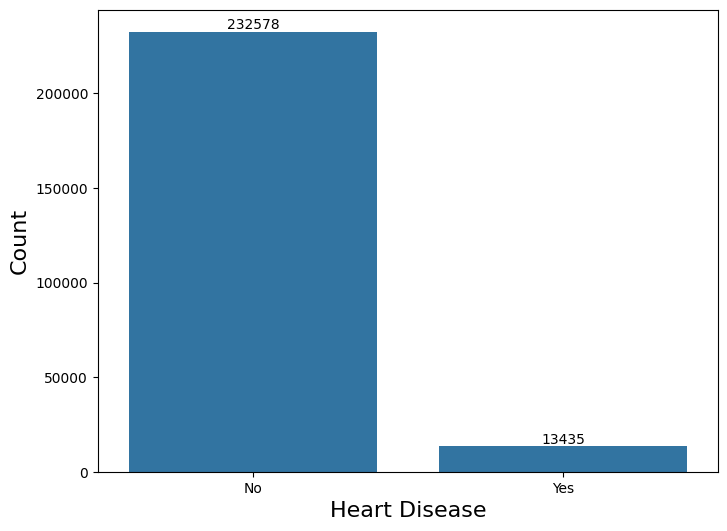

In [93]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataFrame, x='HeartDisease')
ax.bar_label(ax.containers[0])
plt.xlabel('Heart Disease', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

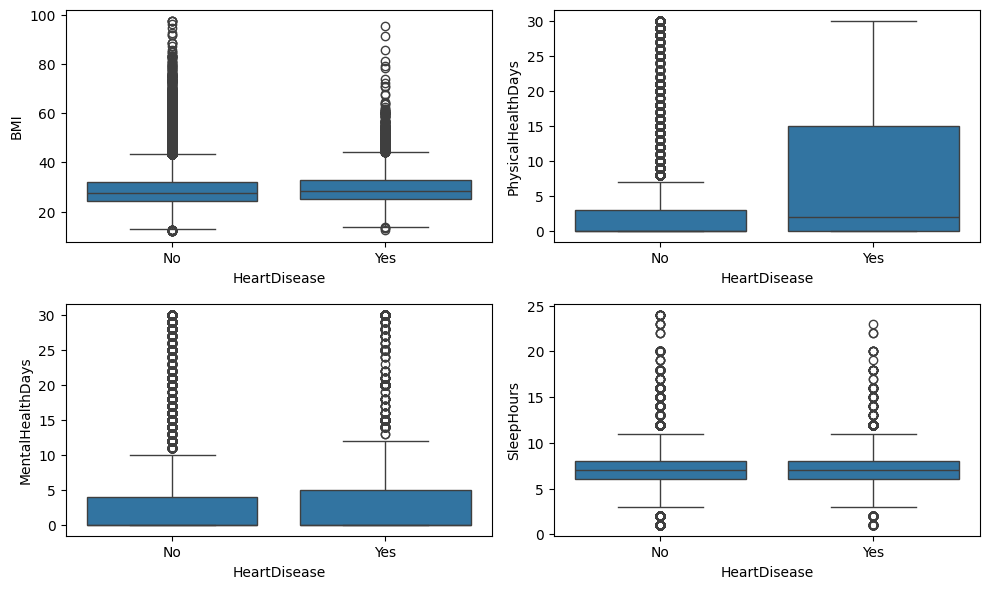

In [94]:
# Feature distributions by target
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
plt.figure(figsize=(10, 6))
n = 1
for column in numerical_cols:
    plt.subplot(2, 2, n)
    n = n+1
    sns.boxplot(data=dataFrame, x='HeartDisease', y=column)
plt.tight_layout()
plt.show()

3. Balance the dataset

In [95]:
# Get the value count for every label
label_counts = dataFrame['HeartDisease'].value_counts()
# Print the class distribution
print("Original Class Distribution:\n", label_counts)

# Find the minority class sample size
min_class_size = label_counts.min()
print(f"Min class size: {min_class_size}")

# Take an equal subset of both classes
df_balanced = dataFrame.groupby('HeartDisease').apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)

# Print shape and head of balanced dataset
print(df_balanced.shape)
print(df_balanced.head())

Original Class Distribution:
 HeartDisease
No     232578
Yes     13435
Name: count, dtype: int64
Min class size: 13435
(26870, 27)
      Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Female     Very good                 0.0               3.0   
1    Male     Very good                14.0               0.0   
2  Female          Good                 0.0               0.0   
3    Male     Excellent                 0.0               0.0   
4    Male          Good                 0.0               0.0   

  PhysicalActivities  SleepHours HadAngina HadStroke HadAsthma HadCOPD  ...  \
0                 No         7.0        No        No        No      No  ...   
1                Yes         7.0        No        No        No      No  ...   
2                Yes         6.0        No        No        No      No  ...   
3                Yes         6.0        No        No        No      No  ...   
4                Yes         7.0        No        No        No      No  ...   

  D

C:\Users\RAVI\AppData\Local\Temp\ipykernel_25276\969546527.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = dataFrame.groupby('HeartDisease').apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)


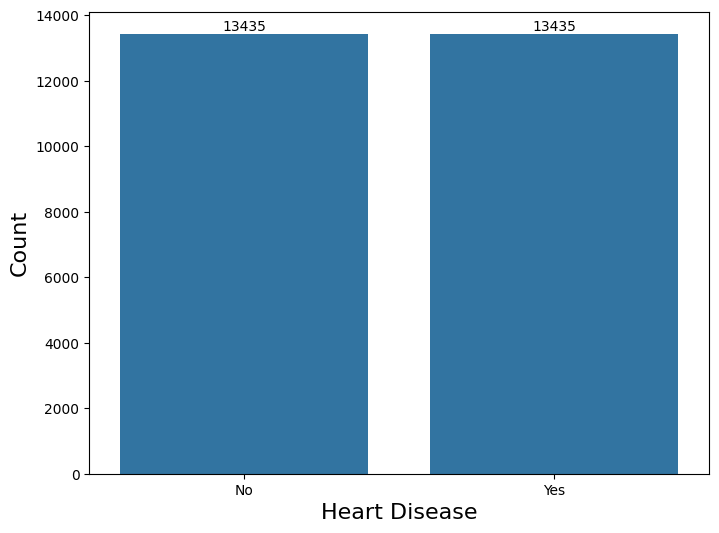

In [96]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_balanced, x='HeartDisease')
ax.bar_label(ax.containers[0])
plt.xlabel('Heart Disease', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

### PART C: Data model
1. Supervised learning: The models used for supervised learning are:<br>
+ LogisticRegression
+ RandomForestClassifier

In [97]:
# Use label encoder to transform categorical columns(columns with non-numerical values)
df_balanced_SL = df_balanced.copy(deep=False)

labelEncoder = LabelEncoder()
categoricalCols = df_balanced_SL.select_dtypes(include=['object']).columns

for column in categoricalCols:
    df_balanced_SL[column] = labelEncoder.fit_transform(df_balanced_SL[column])

a. Split dataset into training and test data

In [98]:
# Separate features and target
X = df_balanced_SL.drop(columns=['HeartDisease'], axis=1)
y = df_balanced_SL['HeartDisease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

b. Implement *LogisticRegression*, and *RandomForestClassifier* to predict using training and test data.
+ Calculate accuracy, precision, recall and f1 scores for both the models.
+ Additionally, plot the ROC(Receiver operating characteristic) curve which represents the True positive rate vs False positive rate.

---------------------------------------------
LogisticRegression()
Cross-Validation Accuracy Scores: [0.79665072 0.78495481 0.78734716 0.79532164 0.79207658]
Average Cross-Validation Accuracy: 0.791
Test Set Accuracy: 0.791
Test Set Precision: 0.796
Test Set Recall: 0.791
Test Set F1: 0.790
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      4024
           1       0.84      0.73      0.78      4037

    accuracy                           0.79      8061
   macro avg       0.80      0.79      0.79      8061
weighted avg       0.80      0.79      0.79      8061

Execution time: 0.100s


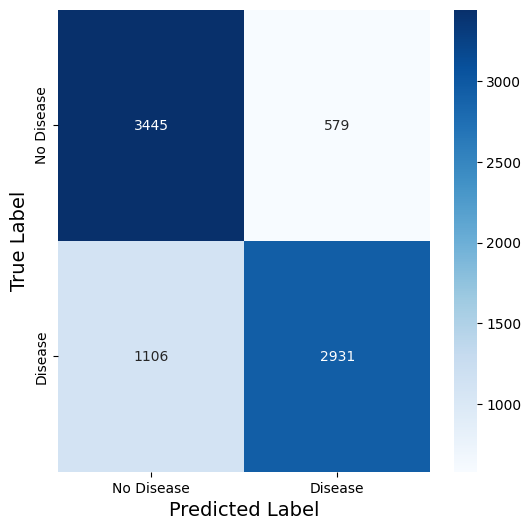

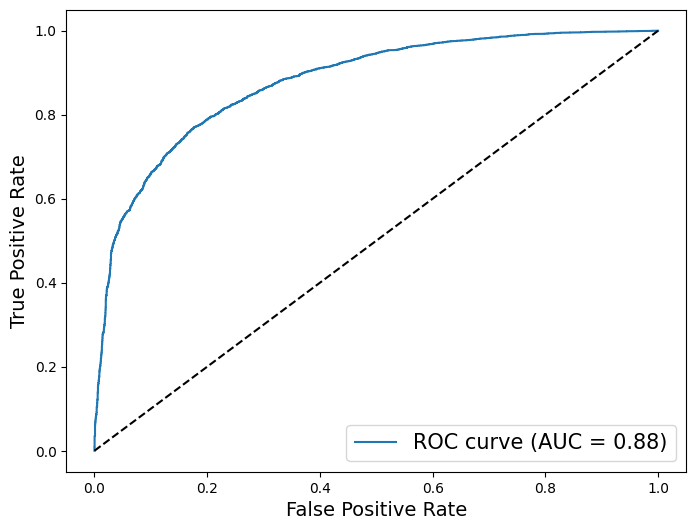

---------------------------------------------
RandomForestClassifier(class_weight='balanced', random_state=3)
Cross-Validation Accuracy Scores: [0.79558745 0.78123339 0.78548644 0.78920787 0.78675884]
Average Cross-Validation Accuracy: 0.788
Test Set Accuracy: 0.789
Test Set Precision: 0.790
Test Set Recall: 0.789
Test Set F1: 0.789
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      4024
           1       0.80      0.77      0.78      4037

    accuracy                           0.79      8061
   macro avg       0.79      0.79      0.79      8061
weighted avg       0.79      0.79      0.79      8061

Execution time: 11.013s


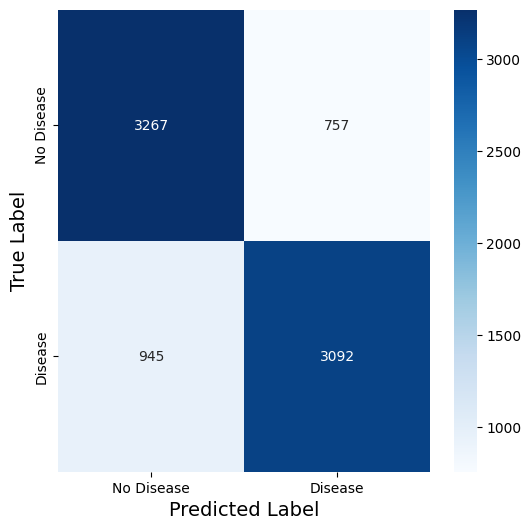

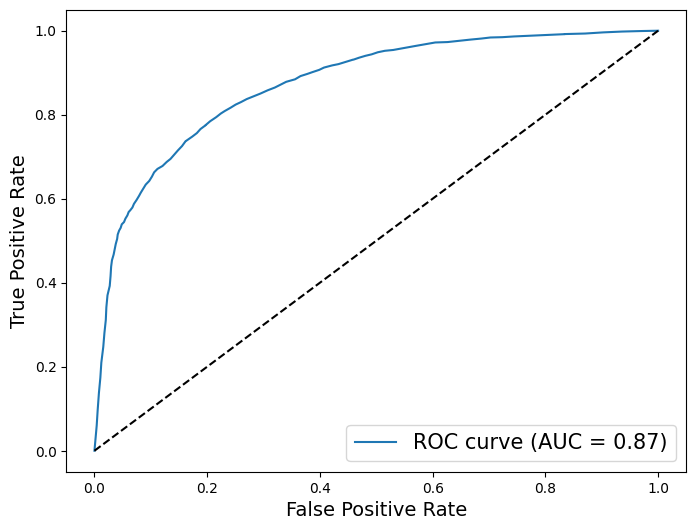

In [99]:
# Use Logistic Regression and Random Forest Classifier
logisticRegressionObj = LogisticRegression()
randomForestClassifierObj = RandomForestClassifier(n_estimators=100, random_state=3, class_weight='balanced')

models = [
          # Logistic regression
          logisticRegressionObj,
          
          # Random Forest Classifier
          randomForestClassifierObj,
         ]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    print("---------------------------------------------")
    print(f"{model}")

    startTime = time.time()

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.3f}")

    # Fit the model with training set
    model.fit(X_train_scaled, y_train)

    # Predict using the model and test set
    y_pred = model.predict(X_test_scaled)

    executionTime = time.time() - startTime

    # Model scores on test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    classReport = classification_report(y_test, y_pred)
    print(f"Test Set Accuracy: {accuracy:.3f}")
    print(f"Test Set Precision: {precision:.3f}")
    print(f"Test Set Recall: {recall:.3f}")
    print(f"Test Set F1: {f1:.3f}")
    print(f"Test Set Classification Report:\n{classReport}")
    print(f"Execution time: {executionTime:.3f}s")

    # Heatmap for Confusion Matrix
    confusionMatrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

    # ROC Curve on test set
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=15, loc='lower right')
    plt.show()

c. Calculate correlation matrix and plot the heatmap


Top Correlations with Heart Disease:
HeartDisease         1.000000
HadAngina            0.528367
AgeCategory          0.401547
DifficultyWalking    0.283253
HadStroke            0.250828
HadDiabetes          0.246181
Name: HeartDisease, dtype: float64


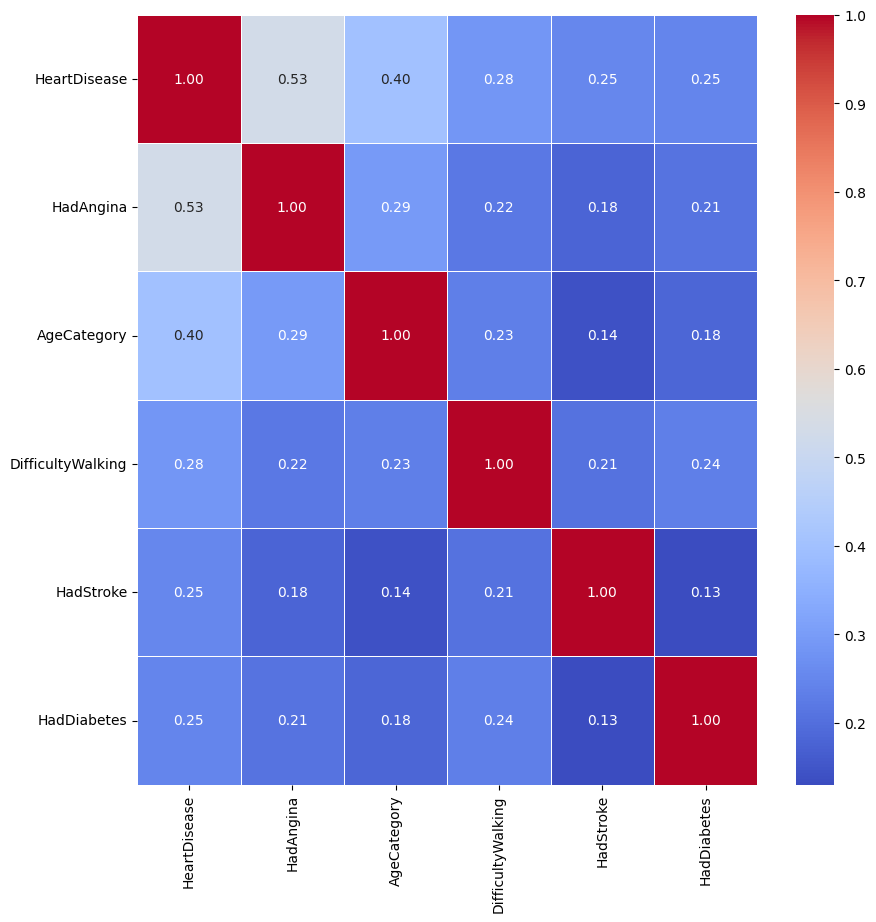

In [100]:
# Calculate correlation with heart disease
correlationMatrix = df_balanced_SL.corr()

correlation = df_balanced_SL.corr()['HeartDisease'].sort_values(ascending=False).head(6)
print("\nTop Correlations with Heart Disease:")
print(correlation.head(10))

topFiveFeatures = correlationMatrix.loc[correlation.index, correlation.index]

# create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(topFiveFeatures, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,)
plt.yticks(rotation=0)
plt.show()

d. Plot top 5 important features from the *RandomForestClassifier*

               Feature  Importance
6            HadAngina    0.193467
21         AgeCategory    0.132312
22                 BMI    0.126487
5           SleepHours    0.059623
2   PhysicalHealthDays    0.049418


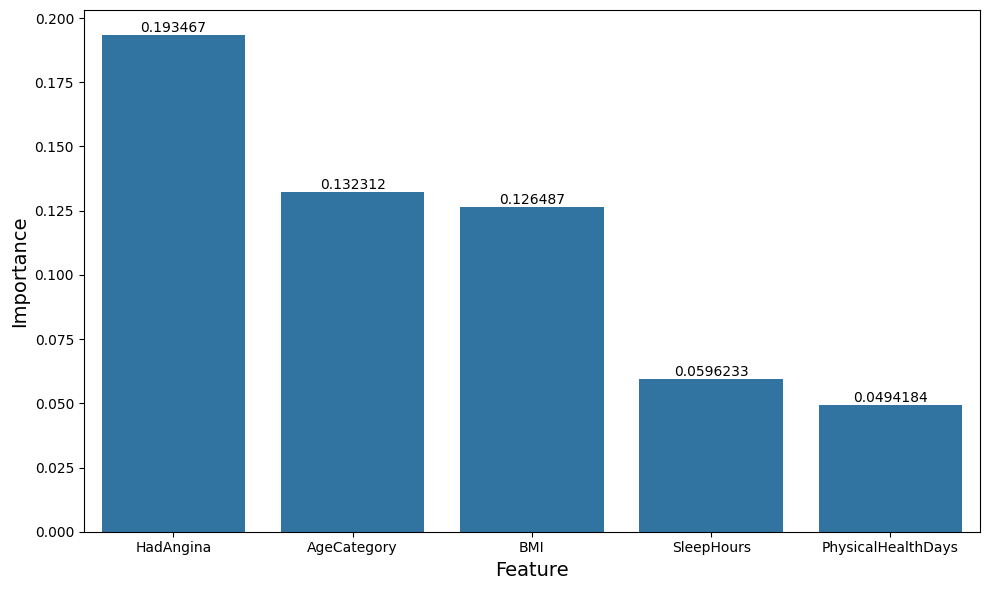

In [101]:
# Calculate feature importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': randomForestClassifierObj.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance.head())

# Create visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Feature', y='Importance', data=feature_importance.head())
ax.bar_label(ax.containers[0])
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()

2. Unsupervised learning: The model used for unsupervised learning:<br>
+ K-Means

In [102]:
# Encode the categorical columns and using scaling
categoricalCols = dataFrame.select_dtypes(include=['object']).columns
dataFrameEncoded = pd.get_dummies(dataFrame, columns=categoricalCols)

scaler = StandardScaler()
dataFrameUSL = scaler.fit_transform(dataFrameEncoded)

In [103]:
# Keep only top 10 most important columns
dataFrameNew = dataFrame[['HadAngina', 'SleepHours', 'PhysicalHealthDays', 'GeneralHealth', 'MentalHealthDays', 
                          'HadStroke', 'Sex', 'HadCOPD', 'PhysicalActivities', 'HadAsthma']]

In [104]:
# Encode the categorical columns and using scaling
categoricalCols = dataFrameNew.select_dtypes(include=['object']).columns
dataFrameEncoded = pd.get_dummies(dataFrameNew, columns=categoricalCols)
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataFrameEncoded)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

print("Shape of dataframe before PCA:", df_scaled.shape)
print("Shape of dataframe after PCA(dimentionality reduction):",pca_result.shape)

Shape of dataframe before PCA: (246013, 20)
Shape of dataframe after PCA(dimentionality reduction): (246013, 2)


In [105]:
# Use K Means clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=3)
kmeans_labels = kmeans.fit_predict(pca_result)

# Get the Silhouette score for the clustering
silhouetteScore = silhouette_score(pca_result, kmeans.labels_)
print(silhouetteScore)

0.5426626538652423


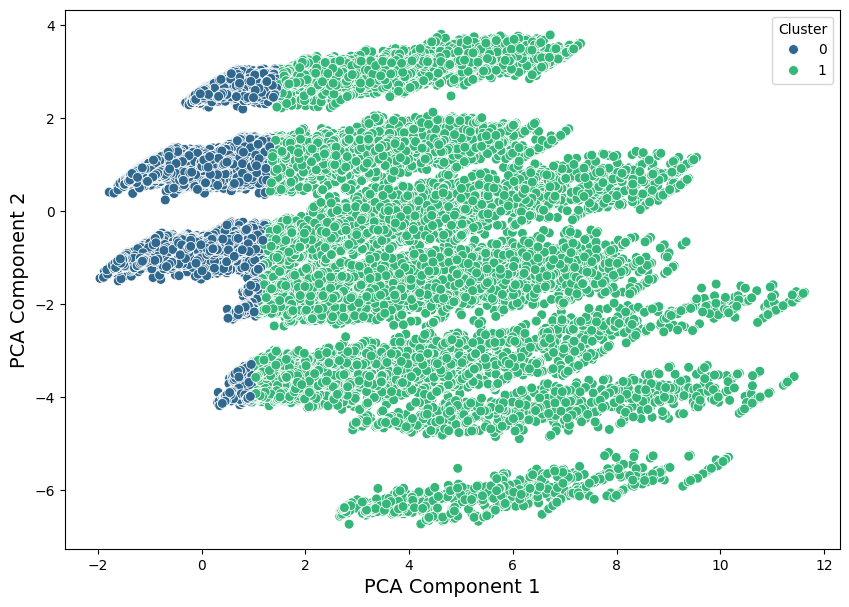

In [106]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=kmeans_labels, palette="viridis", s=50
)
#plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title="Cluster", loc='upper right')
plt.show()